In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
#tensorflow API 讀mnist資料

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [24]:
print('Number of training images:' + str(mnist.train.images.shape[0]))
print('Number of validation images:' + str(mnist.validation.images.shape[0]))
print('Number of testing images:' + str(mnist.test.images.shape[0]))
print('\n')
print('Number of training labels:' + str(mnist.train.labels.shape[0]))
print('Number of validation labels:' + str(mnist.validation.labels.shape[0]))
print('Number of testing labels:' + str(mnist.test.labels.shape[0]))
#查看training, aalidation, testing data數量

Number of training images:55000
Number of validation images:5000
Number of testing images:10000


Number of training labels:55000
Number of validation labels:5000
Number of testing labels:10000


array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])

e:\python\python36\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['Microsoft JhengHei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


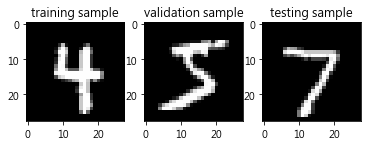

In [27]:
import matplotlib.pyplot as plt
sample_train = mnist.train.images[0].reshape(28, 28)
#sample_validation = mnist.validation.images[0].reshape(28, 28)
#sample_test = mnist.test.images[0].reshape(28, 28)
plt.imshow(sample_train, cmap='gray')
#plt.imshow(sample_validation, cmap='gray')
#plt.imshow(sample_test, cmap='gray')
plt.subplot(231)
plt.gca().set_title('training sample')
plt.imshow(mnist.train.images[0].reshape(28, 28), cmap='gray')
plt.subplot(232)
plt.gca().set_title('validation sample')
plt.imshow(mnist.validation.images[0].reshape(28, 28), cmap='gray')
plt.subplot(233)
plt.gca().set_title('testing sample')
plt.imshow(mnist.test.images[0].reshape(28, 28), cmap='gray')

In [14]:
x = tf.placeholder(tf.float32, [None, 784])
y = tf.placeholder(tf.float32, [None, 10])
#placeholder可以傳入變數的shape也就是變數的概念
W_L1 = tf.Variable(tf.zeros([784, 10]))
b_L1 = tf.Variable(tf.zeros([10]))
#需要的weightc和bias數量


#單層的非線性mapping
#input -> hidden layer -> sofmax

output = tf.matmul(x, W_L1) + b_L1
#單層的非線性mapping
#input -> hidden layer -> sofmax

#建好Graph
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=output))
#Loss function(cross entropy)預測出來的資料分布與真實data的資料分布的誤差(距離)
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()
#initial 變數(weights, biases)
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(cross_entropy)
#optimalization, learning rate 0.01 利用上面的cross entropy最佳化(最小loss 對應的W和b) 
for i in range(100000):
#training 10000個step, 一個step代表一個batch完成training
    batch_x, batch_y = mnist.train.next_batch(100)
    #batch size = 100每個batch包含100個training sample 
    sess.run(train_step, feed_dict={x: batch_x, y: batch_y})
    if i % 1000 == 0:
    #每1000個step報告一次precision和loss    
        correct_prediction = tf.equal(tf.argmax(output, 1), tf.argmax(y, 1))
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
        print(sess.run([accuracy, cross_entropy], feed_dict={x: mnist.test.images, y: mnist.test.labels}))


e:\python\python36\lib\site-packages\tensorflow\python\client\session.py:1714: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


[0.2824, 2.2922456]
[0.8706, 0.585413]
[0.8851, 0.46648556]
[0.8929, 0.4186896]
[0.8981, 0.39178875]
[0.9006, 0.37357852]
[0.9036, 0.36020806]
[0.9065, 0.3503317]
[0.9084, 0.34235504]
[0.9088, 0.3360726]
[0.9106, 0.330825]
[0.911, 0.32612666]
[0.9128, 0.32220334]
[0.9136, 0.31840065]
[0.914, 0.315682]
[0.9145, 0.3130408]
[0.9165, 0.31028107]
[0.9163, 0.30798334]
[0.9166, 0.30600348]
[0.9161, 0.304257]
[0.9165, 0.3027142]
[0.9176, 0.30108628]
[0.9183, 0.29937422]
[0.9178, 0.29807305]
[0.9177, 0.29698807]
[0.9183, 0.29612157]
[0.9188, 0.29465553]
[0.9188, 0.2934587]
[0.9183, 0.292656]
[0.9193, 0.2916947]
[0.919, 0.29092968]
[0.9198, 0.28998747]
[0.9197, 0.28995824]
[0.9198, 0.28858858]
[0.9197, 0.2878997]
[0.92, 0.28715158]
[0.9205, 0.28671366]
[0.9196, 0.28629398]
[0.9204, 0.2854312]
[0.9206, 0.2851275]
[0.9211, 0.28456864]
[0.9202, 0.2839508]
[0.9199, 0.2833697]
[0.9205, 0.28300938]
[0.921, 0.28234774]
[0.9205, 0.282429]
[0.9199, 0.28155398]
[0.9209, 0.28165814]
[0.9215, 0.28081638]
[0